In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [12]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-eshmanskaja/mini_projects/7_10/hw_aa.csv', sep = ';')

In [13]:
df.head()

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


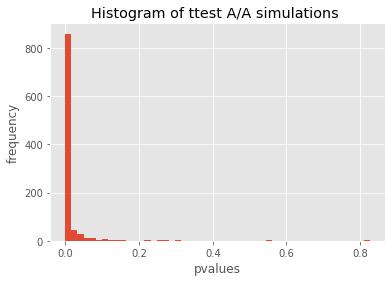

0.932

In [14]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[df.experimentVariant == 0]['purchase'].sample(n_s, replace = False).values
    s2 = df[df.experimentVariant == 1]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [15]:
#в 93% случаях мы получим стат значимые различия

In [16]:
#посмотрим, насколько сильно отличается конверсия в покупку в 2 контрольных группах
df\
    .groupby('experimentVariant',as_index=False)\
    .agg({'purchase':'mean'})

,experimentVariant,purchase
0,0,0.023945
1,1,0.053242


In [17]:
#посмотрим, насколько сильно отличается конверсия в покупку в разбивке на контрольные группы и версии моб приложений
df_mob_v=df\
    .groupby(['experimentVariant','version' ],as_index=False)\
    .agg({'purchase':'mean'})
df_mob_v

,experimentVariant,version,purchase
0,0,v2.8.0,0.000993
1,0,v2.9.0,0.074658
2,0,v3.7.4.0,0.059943
3,0,v3.8.0.0,0.057604
4,1,v2.8.0,0.045606
5,1,v2.9.0,0.071304
6,1,v3.7.4.0,0.063018
7,1,v3.8.0.0,0.062848


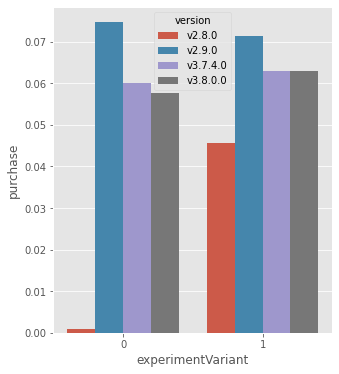

In [18]:
plt.figure(figsize=(5,6))
ax=sns.barplot(x='experimentVariant', y = 'purchase', data = df_mob_v, hue='version')

In [19]:
#здесь мы можем увидеть, что у 0 и 1 варианта сильно различается конверсия у версии МП 2.8.0
#попробуем исключить ее из А/А теста

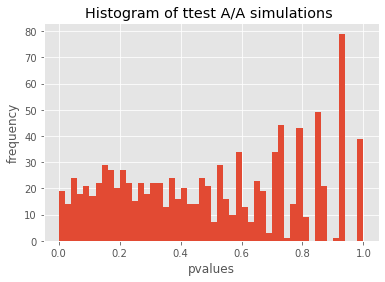

0.043

In [20]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 0)&(df.version != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 1)&(df.version != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [ ]:
#FPR не превышает заданного уровня альфа, значит проблема в сплитовании версии МП 2.8.0